# Train Models with Dask-ML

#### Objective:
- Demonstrate how you can leverage Dask-ML with Dask on a CML Cluster

#### The complete reference to Dask-ML can be found here: https://ml.dask.org/

#### This tutorial has a more detailed comparison with Scikit-Learn: https://github.com/dask/dask-tutorial/blob/master/08_machine_learning.ipynb

#### The code is referenced from this page: https://examples.dask.org/machine-learning/training-on-large-datasets.html

In [1]:
import cdsw_dask_utils
import cdsw

# Run a Dask cluster with three workers and return an object containing
# a description of the cluster. 
# 
# Note that the scheduler will run in the current session, and the Dask
# dashboard will become available in the nine-dot menu at the upper
# right corner of the CDSW app.

cluster = cdsw_dask_utils.run_dask_cluster(
  n=3, \
  cpu=1, \
  memory=1, \
  nvidia_gpu=0
)

# Connect a Dask client to the scheduler address in the cluster
# description.
from dask.distributed import Client
client = Client(cluster["scheduler_address"])
client

Waiting for Dask scheduler to become ready...
Dask scheduler is ready
IDs ['jho0v6o1punnzkll', 'ca3y8kugbggd9dxa', 'gsqt0lzbi2l6nimr']


Client Scheduler: tcp://10.0.85.15:2323 Dashboard: http://10.0.85.15:8100/status,Cluster Workers: 5 Cores: 80 Memory: 5.00 GB


#### Dask Scheduler UI

In [ ]:
import os 
engine_id = os.environ.get('CDSW_ENGINE_ID')
cdsw_domain = os.environ.get('CDSW_DOMAIN')

from IPython.core.display import HTML
HTML('<a  target="_blank" rel="noopener noreferrer" href="http://read-only-{}.{}">http://read-only-{}.{}</a>'
     .format(engine_id,cdsw_domain,engine_id,cdsw_domain))

In [2]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [3]:
# Scale up: increase n_samples or n_features
X, y = dask_ml.datasets.make_blobs(n_samples=1000000,
                                   chunks=100000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
X

dask.array<concatenate, shape=(1000000, 2), dtype=float64, chunksize=(100000, 2), chunktype=numpy.ndarray>

#### Instantiating K-Means from Dask-ML module and fitting the estimator

In [4]:
km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

KMeans(algorithm='full', copy_x=True, init='k-means||', init_max_iter=2,
       max_iter=300, n_clusters=3, n_jobs=1, oversampling_factor=10,
       precompute_distances='auto', random_state=None, tol=0.0001)

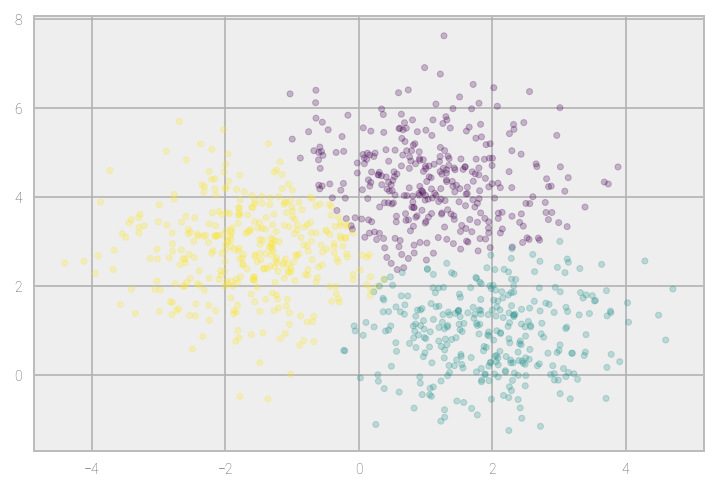

In [5]:
fig, ax = plt.subplots()
ax.scatter(X[::1000, 0], X[::1000, 1], marker='.', c=km.labels_[::1000],
           cmap='viridis', alpha=0.25);

#### Stopping Workers

In [6]:
## stop CDSW workers
#Parameter
#worker_id (int, optional) - The ID numbers of the worker engines that must be stopped. 
#If an ID is not provided, all the worker engines on the cluster will be stopped.

cdsw.stop_workers()

[<Response [204]>,
 <Response [204]>,
 <Response [204]>,
 <Response [204]>,
 <Response [204]>,
 <Response [204]>,
 <Response [204]>,
 <Response [204]>,
 <Response [204]>,
 <Response [204]>,
 <Response [204]>,
 <Response [204]>,
 <Response [204]>,
 <Response [204]>]

#### Many Scikit-Learn estimators are not available in Dask-ML. 

#### Next we will see how to use Dask-ML as a wrapper for Scikit-Learn estimators.